# **필요한 라이브러리 불러오기**

In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
from torchvision import transforms

import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# device : gpu를 사용할 경우에는 'cuda', 그렇지 않을 경우에는 'cpu'
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# 랜덤 시드 고정
# 실험 조건을 동일하게 설정하여 같은 input을 넣으면 같은 결과가 나올 수 있도록 함
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

# **Hyper parameter**

Batch
* 한번에 처리하기 힘든 데이터셋을 처리하기 위하여 사용.
* batch는 dataset의 일부를 담은 입력 데이터
* 파이토치에서는 DataLoader라는 클래스를 제공하여 batch로 데이터를 처리할 수 있게끔 함. 

In [19]:
batch_size = 128      # 배치크기
epochs = 10           # 학습 횟수
learning_rate = 0.01  # 학습률
num_classes = 10      # 총 클래스 수

# **CIFAR10 데이터셋 불러오기**
- 50,000개의 train data, 10,000개의 test data
- classes = { 0 : airplane, 1 : automobile, 2 : bird, 3 : cat, 4 : deer, 5 : dog, 6 : frog, 7 : horse, 8 : ship, 9 : truck }

In [4]:
train_dataset = datasets.CIFAR10(root='dataset/', train=True, download=True,
                                 transform=transforms.Compose([transforms.ToTensor(),
                                                               transforms.Normalize(mean=(0.4914, 0.4822, 0.4465),std=(0.247, 0.243, 0.261))]))
test_dataset = datasets.CIFAR10(root='dataset/', train=False, download=True,
                                transform=transforms.Compose([transforms.ToTensor(),
                                                              transforms.Normalize(mean=(0.4914, 0.4822, 0.4465),std=(0.247, 0.243, 0.261))]))
train_loader=torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting dataset/cifar-10-python.tar.gz to dataset/
Files already downloaded and verified


In [5]:
# train data 정보 확인
train_dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: dataset/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261))
           )

In [6]:
# test data 정보 확인
test_dataset

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: dataset/
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261))
           )

# **데이터 시각화**

In [7]:
# 이미지 레이블을 실제 이름과 매치
classes = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

In [8]:
# train data의 첫번째 샘플을 출력
train_dataset[0]

(tensor([[[-1.0527e+00, -1.3068e+00, -1.1956e+00,  ...,  5.1906e-01,
            4.2380e-01,  3.6029e-01],
          [-1.7354e+00, -1.9895e+00, -1.7037e+00,  ..., -3.6628e-02,
           -1.0013e-01, -5.2505e-02],
          [-1.5926e+00, -1.7354e+00, -1.2115e+00,  ..., -1.1601e-01,
           -8.4258e-02, -2.5890e-01],
          ...,
          [ 1.3129e+00,  1.2018e+00,  1.1541e+00,  ...,  5.5081e-01,
           -1.1004e+00, -1.1480e+00],
          [ 8.6835e-01,  7.5721e-01,  9.6361e-01,  ...,  9.3186e-01,
           -4.4942e-01, -6.7170e-01],
          [ 8.2072e-01,  6.7783e-01,  8.5247e-01,  ...,  1.4399e+00,
            4.0792e-01, -3.6628e-02]],
 
         [[-9.8380e-01, -1.2420e+00, -1.2097e+00,  ...,  1.4587e-01,
            3.2906e-02,  1.6768e-02],
          [-1.6616e+00, -1.9844e+00, -1.8553e+00,  ..., -5.6421e-01,
           -6.4490e-01, -5.8034e-01],
          [-1.5970e+00, -1.8714e+00, -1.5486e+00,  ..., -6.2876e-01,
           -6.2876e-01, -8.0628e-01],
          ...,
    

* 이미지에 해당하는 텐서와, 레이블로 이루어져 있음.
* 마지막의 6은 위 CLASSES 딕셔너리를 보면 frog에 해당.

In [9]:
# 첫번째 데이터 묶음 반환
images, labels = next(iter(train_loader))

In [10]:
# 데이터 shape 확인
images.shape , labels.shape

(torch.Size([128, 3, 32, 32]), torch.Size([128]))

In [11]:
def minmax_scale(input): # 픽셀 값 범위 0 ~ 1로 조정
  min_val = np.min(input)
  max_val=np.max(input)
  out = (input-min_val)/(max_val-min_val)
  return out

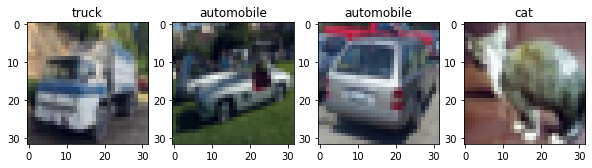

In [12]:
# train data의 이미지와 레이블을 시각화
img = images.numpy().transpose(0,2,3,1)
img = minmax_scale(img)
label = labels.numpy()

plt.figure(figsize=(10,20))
plt.subplot(1,4,1)
plt.imshow(img[0])
plt.title(classes[label[0]])
plt.subplot(1,4,2)
plt.imshow(img[1])
plt.title(classes[label[1]])
plt.subplot(1,4,3)
plt.imshow(img[2])
plt.title(classes[label[2]])
plt.subplot(1,4,4)
plt.imshow(img[3])
plt.title(classes[label[3]])
plt.show()

# **모델 설계**
- CNN

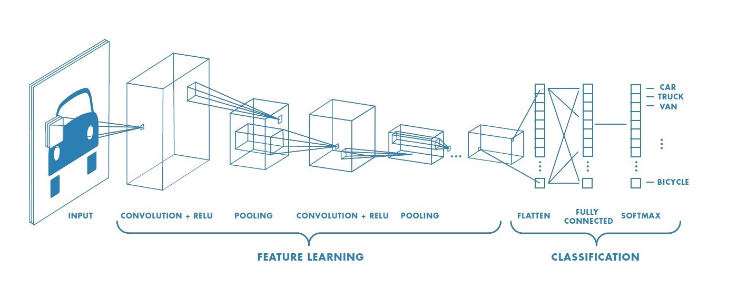

In [28]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Conv Layer block 1
        # input shape = (batch, 3, 32, 32)
        #   Conv     -> (batch, 16, 32, 32)
        #   Pool     -> (batch, 16, 16, 16)
        self.layer1 = nn.Sequential(               
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1), 
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2))
        
        # Conv Layer block 2
        # input shape = (batch, 16, 16, 16)
        #   Conv     -> (batch, 32, 16, 16)
        #   Pool     -> (batch, 32, 8, 8)   
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2))

        # Conv Layer block 3
        # input shape = (batch, 32, 8, 8)
        #   Conv     -> (batch, 64, 8, 8)
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True))
        
        # Dense Layer block 4
        # 64x8x8 inputs -> 1024 outputs
        self.fc1 = nn.Sequential(               
            nn.Linear(64*8*8, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1))
        
        # Dense Layer block 5
        # 1024 inputs -> 10 outputs
        self.fc2 = nn.Sequential(nn.Linear(1024, 10))

    # Inference (input data를 네트워크에 순방향으로 전달하여 출력으로 변환)
    def forward(self, x):        
        x = self.layer1(x)       
        x = self.layer2(x)
        x = self.layer3(x)
        x = x.view(x.size(0), -1) # flatten all dimensions except batch        
        x = self.fc1(x)
        x = self.fc2(x)
        return x

# CNN 모델 선언
model = CNN().to(device)
# 모델 구성 출력
print(model)

CNN(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (fc1): Sequential(
    (0): Linear(in_features=4096, out_features=1024, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.1, inplace=False)
  )
  (fc2): Seq

# **Train**

In [29]:
# cost function과 optimizer 정의
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [30]:
# 모델 학습
# epoch마다 train loss 기록
loss_list = []
model.train()

for epoch in range(epochs):   
  avg_loss = 0.0
  total_loss = 0.0
  for iter, data in enumerate(train_loader):
    images, labels = data
    images, labels = images.to(device), labels.to(device)
        
    # initialize weights 
    optimizer.zero_grad() 

    # forward
    outputs = model(images)   

    # loss 계산
    loss = criterion(outputs, labels)    

    # back propagation
    loss.backward()
    optimizer.step()

    avg_loss += loss.item()
    total_loss += loss.item()
    if epoch == 0 and iter==0:
      loss_list.append(total_loss)

    if (iter+1) % 100==0:
      print('Train Epoch: {} [{}/{}]\tLoss: {:.5f}'.format(
      epoch, iter+1, len(train_loader), avg_loss/100.))
      avg_loss = 0.0
  loss_list.append(total_loss/(iter+1))  
print('\nLearning finished!')

Train Epoch: 0 [100/391]	Loss: 1.98224
Train Epoch: 0 [200/391]	Loss: 1.62147
Train Epoch: 0 [300/391]	Loss: 1.48586
Train Epoch: 1 [100/391]	Loss: 1.31435
Train Epoch: 1 [200/391]	Loss: 1.26407
Train Epoch: 1 [300/391]	Loss: 1.21989
Train Epoch: 2 [100/391]	Loss: 1.12770
Train Epoch: 2 [200/391]	Loss: 1.10041
Train Epoch: 2 [300/391]	Loss: 1.08322
Train Epoch: 3 [100/391]	Loss: 1.01443
Train Epoch: 3 [200/391]	Loss: 0.99080
Train Epoch: 3 [300/391]	Loss: 0.98417
Train Epoch: 4 [100/391]	Loss: 0.91717
Train Epoch: 4 [200/391]	Loss: 0.92213
Train Epoch: 4 [300/391]	Loss: 0.91139
Train Epoch: 5 [100/391]	Loss: 0.87375
Train Epoch: 5 [200/391]	Loss: 0.87084
Train Epoch: 5 [300/391]	Loss: 0.84741
Train Epoch: 6 [100/391]	Loss: 0.81300
Train Epoch: 6 [200/391]	Loss: 0.81906
Train Epoch: 6 [300/391]	Loss: 0.80370
Train Epoch: 7 [100/391]	Loss: 0.77217
Train Epoch: 7 [200/391]	Loss: 0.76432
Train Epoch: 7 [300/391]	Loss: 0.76473
Train Epoch: 8 [100/391]	Loss: 0.71056
Train Epoch: 8 [200/391]	

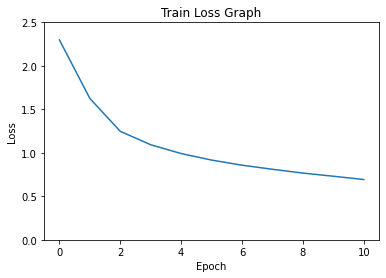

In [33]:
# Loss graph
plt.plot(range(0,epochs+1), loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0,2.5)
plt.title('Train Loss Graph')
plt.show()

# **Test**

Accuracy : 71.03%
Label:  ship
Prediction:  ship


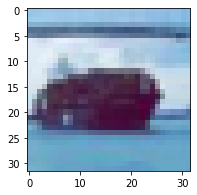

In [34]:
# 모델 성능 확인
with torch.no_grad(): # torch.no_grad(): gradient 계산을 수행하지 않음
  model.eval()
  accuracy = 0.0
  for iter, data in enumerate(test_loader):
    images, labels = data
    images = images.to(device)
    labels = labels.to(device)
    output = model(images)

    # 모델이 예측한 값과 실제 레이블인 labels를 비교
    # argmax 함수를 이용해 예측한 값 중 가장 확률이 높은 값을 예측 값으로 사용 (예) [0.1,0.05,0.7,0,0,0.15] -> 2
    pred = torch.argmax(output,1) == labels
    accuracy += pred.float().sum()
    
  print("Accuracy : {:.2f}%".format(100*accuracy/len(test_dataset)))

  # 테스트 데이터에서 무작위로 하나를 뽑아서 예측
  r = random.randint(0, len(test_dataset) - 1)
  X_single_data = test_dataset[r][0].unsqueeze(0).float().to(device)
  Y_single_data = test_dataset[r][1]

  print('Label: ', classes[Y_single_data])
  single_prediction = model(X_single_data)
  print('Prediction: ', classes[torch.argmax(single_prediction, 1).item()])
  img = test_dataset[r][0].unsqueeze(0).numpy().transpose(0,2,3,1)
  img = minmax_scale(img)
  plt.figure(figsize=(3,3))
  plt.imshow(img[0])
  plt.show()

# **모델 저장**

In [ ]:
# 모델의 weight만 저장
torch.save(model.state_dict(),'cnn_cifar10_weight.pth')

In [ ]:
# 모델 통째로 저장
torch.save(model,'cnn_cifar10.pth')